<a href="https://colab.research.google.com/github/Omkaar-Kasodekar/EDA-22BDS0087/blob/main/22BDS0087.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/NaturalGas.csv")
df

,rownames,state,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
0,1,NY,35,1967,313656,1.42,2.98,7.40,1.47,6262,10903.75
1,2,NY,35,1968,319282,1.38,2.91,7.77,1.42,6125,11370.02
2,3,NY,35,1969,331326,1.37,2.84,7.96,1.38,6040,11578.68
3,4,NY,35,1970,346533,1.40,2.87,8.33,1.37,6085,11586.77
4,5,NY,35,1971,352085,1.50,3.07,8.80,1.40,5907,11657.42
...,...,...,...,...,...,...,...,...,...,...,...
133,134,CA,5,1985,527495,5.72,7.78,30.58,5.84,2694,14368.46
134,135,CA,5,1986,464307,5.14,7.95,44.15,5.72,2192,14580.77
135,136,CA,5,1987,503473,5.26,8.03,35.24,5.14,2502,14915.05
136,137,CA,5,1988,497138,5.64,8.69,34.02,5.26,2366,15340.38


Dimensions

In [84]:
dimensions = df.shape
print(f"The dataset has {dimensions[0]} rows and {dimensions[1]} columns")

The dataset has 138 rows and 11 columns


Summary Statistics


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     138 non-null    int64  
 1   state        138 non-null    object 
 2   statecode    138 non-null    int64  
 3   year         138 non-null    int64  
 4   consumption  138 non-null    int64  
 5   price        138 non-null    float64
 6   eprice       138 non-null    float64
 7   oprice       138 non-null    float64
 8   lprice       138 non-null    float64
 9   heating      138 non-null    int64  
 10  income       138 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 12.0+ KB


In [86]:
# Generate and print summary statistics for the numerical columns
print("Summary Statistics for the Numerical Columns:")
print(df.describe())

Summary Statistics for the Numerical Columns:
         rownames  statecode         year    consumption       price  \
count  138.000000  138.00000   138.000000     138.000000  138.000000   
mean    69.500000   27.00000  1978.000000  252901.478261    3.422319   
std     39.981246   15.68811     6.657415  184478.131559    2.169215   
min      1.000000    5.00000  1967.000000    9430.000000    0.680000   
25%     35.250000   10.00000  1972.000000   49103.500000    1.380000   
50%     69.500000   29.00000  1978.000000  300835.500000    2.775000   
75%    103.750000   44.00000  1984.000000  346428.750000    5.310000   
max    138.000000   45.00000  1989.000000  637289.000000    8.060000   

           eprice      oprice      lprice      heating        income  
count  138.000000  138.000000  138.000000   138.000000    138.000000  
mean     5.053551   24.635580    3.207681  4154.528986  11193.235652  
std      2.577859   15.401018    2.124937  2451.998462   1906.726093  
min      1.980000    

In [87]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create a dictionary to store the results
results = {}

# Iterate through each numerical column and calculate the statistics
for col in numerical_cols:
    std_dev = df[col].std()
    variance = df[col].var()
    data_range = df[col].max() - df[col].min()
    results[col] = {
        'Standard Deviation': std_dev,
        'Variance': variance,
        'Range': data_range
    }

# Print the results in a formatted way
for col, stats in results.items():
    print(f"Statistics for '{col}'")
    print(f"Standard Deviation: {stats['Standard Deviation']:.2f}")
    print(f"Variance: {stats['Variance']:.2f}")
    print(f"Range: {stats['Range']:.2f}\n")

Statistics for 'rownames'
Standard Deviation: 39.98
Variance: 1598.50
Range: 137.00

Statistics for 'statecode'
Standard Deviation: 15.69
Variance: 246.12
Range: 40.00

Statistics for 'year'
Standard Deviation: 6.66
Variance: 44.32
Range: 22.00

Statistics for 'consumption'
Standard Deviation: 184478.13
Variance: 34032181023.54
Range: 627859.00

Statistics for 'price'
Standard Deviation: 2.17
Variance: 4.71
Range: 7.38

Statistics for 'eprice'
Standard Deviation: 2.58
Variance: 6.65
Range: 8.88

Statistics for 'oprice'
Standard Deviation: 15.40
Variance: 237.19
Range: 46.72

Statistics for 'lprice'
Standard Deviation: 2.12
Variance: 4.52
Range: 7.19

Statistics for 'heating'
Standard Deviation: 2452.00
Variance: 6012296.46
Range: 6959.00

Statistics for 'income'
Standard Deviation: 1906.73
Variance: 3635604.39
Range: 8959.99



Data Handling and Data Cleaning

In [88]:
print("No of Null Values in Table:")
df.isnull().sum()

No of Null Values in Table:


,0
rownames,0
state,0
statecode,0
year,0
consumption,0
price,0
eprice,0
oprice,0
lprice,0
heating,0


In [89]:
print("No. of duplicate rows:")
df.duplicated().sum()

No. of duplicate rows:


np.int64(0)

In [90]:
# Drop the 'rownames' and 'statecode' columns as they are unnecessary identifier
df = df.drop(['rownames', 'statecode'], axis=1)
df.head()

,state,year,consumption,price,eprice,oprice,lprice,heating,income
0,NY,1967,313656,1.42,2.98,7.40,1.47,6262,10903.75
1,NY,1968,319282,1.38,2.91,7.77,1.42,6125,11370.02
2,NY,1969,331326,1.37,2.84,7.96,1.38,6040,11578.68
3,NY,1970,346533,1.40,2.87,8.33,1.37,6085,11586.77
4,NY,1971,352085,1.50,3.07,8.80,1.40,5907,11657.42


## Univariate Analysis

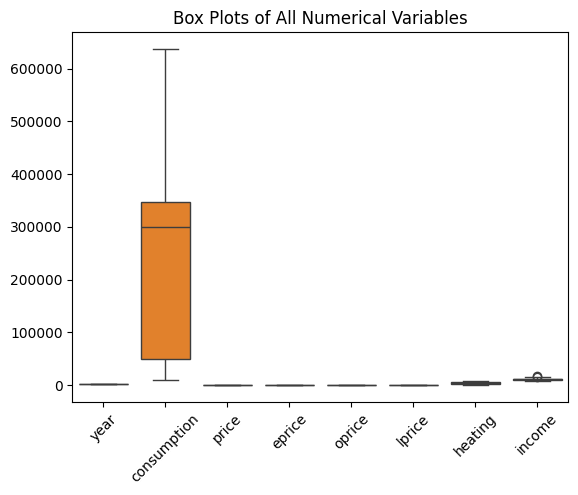

In [92]:
# 1. Box plots for all numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots of All Numerical Variables')
plt.xticks(rotation=45)
plt.show()

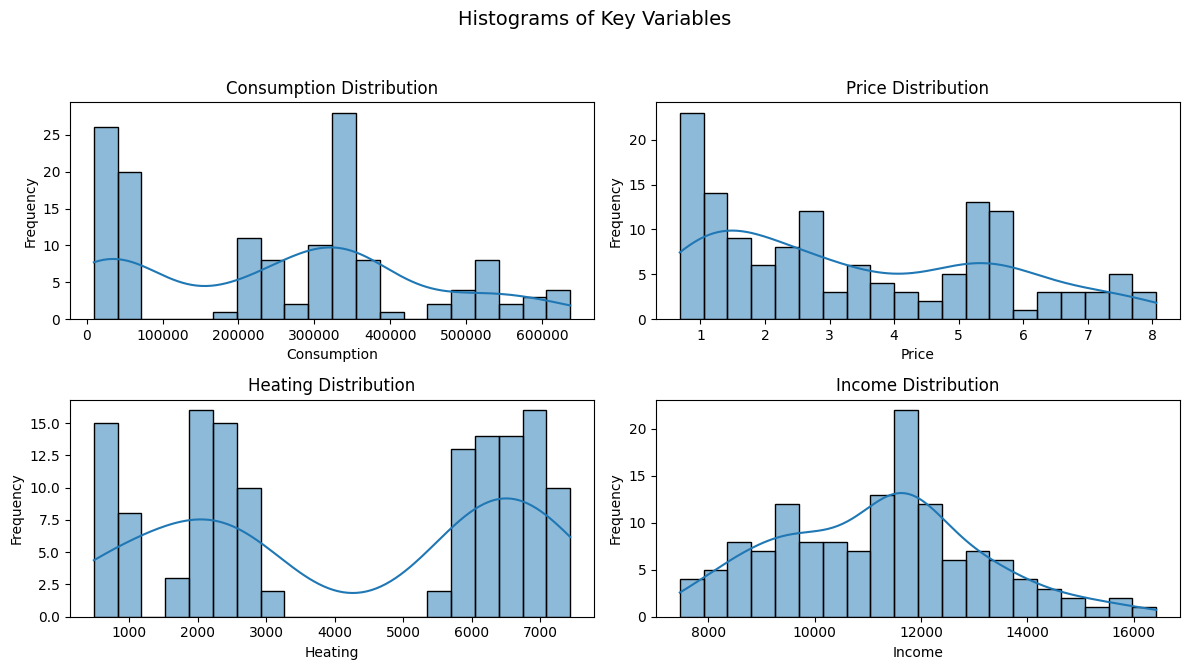

In [93]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
fig.suptitle('Histograms of Key Variables', fontsize=14)

# Histogram for 'consumption'
sns.histplot(df['consumption'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Consumption Distribution')
axes[0, 0].set_xlabel('Consumption')
axes[0, 0].set_ylabel('Frequency')

# Histogram for 'price'
sns.histplot(df['price'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Price Distribution')
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Frequency')

# Histogram for 'heating'
sns.histplot(df['heating'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Heating Distribution')
axes[1, 0].set_xlabel('Heating')
axes[1, 0].set_ylabel('Frequency')

# Histogram for 'income'
sns.histplot(df['income'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Income Distribution')
axes[1, 1].set_xlabel('Income')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

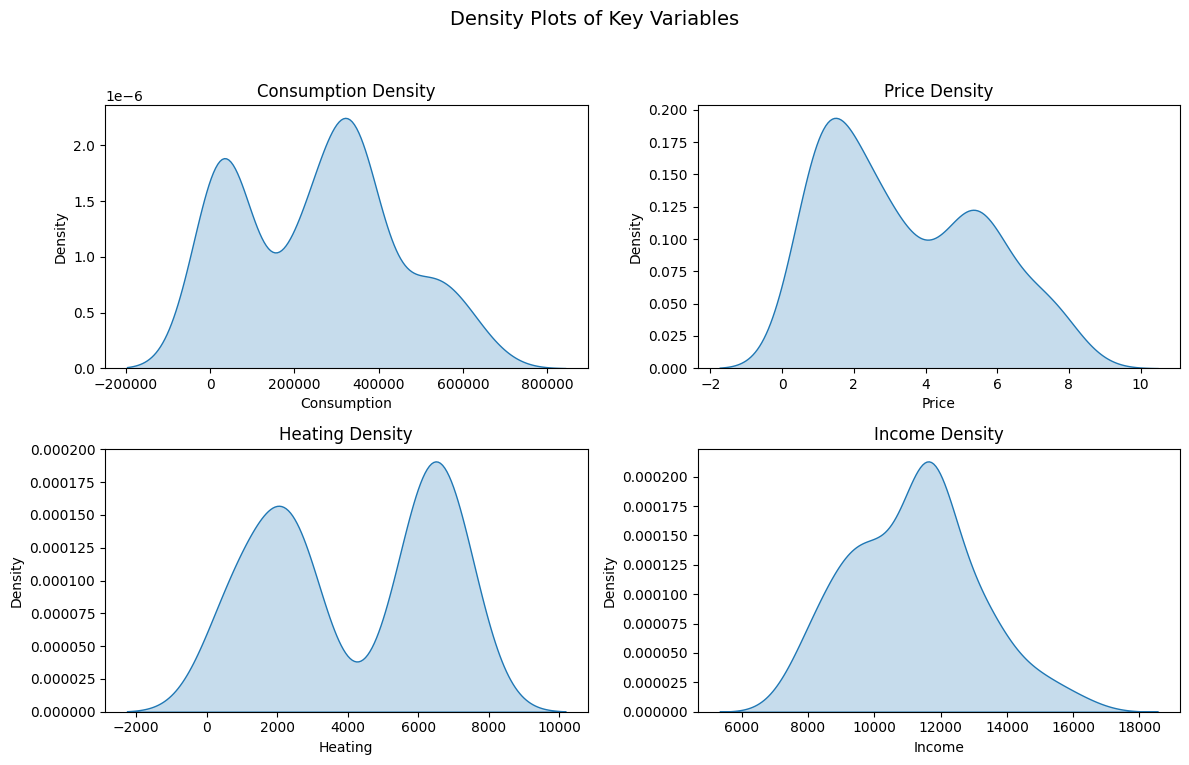

In [94]:
# 3. Density Plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Density Plots of Key Variables', fontsize=14)

# Density plot for 'consumption'
sns.kdeplot(df['consumption'], fill=True, ax=axes[0, 0])
axes[0, 0].set_title('Consumption Density')
axes[0, 0].set_xlabel('Consumption')
axes[0, 0].set_ylabel('Density')

# Density plot for 'price'
sns.kdeplot(df['price'], fill=True, ax=axes[0, 1])
axes[0, 1].set_title('Price Density')
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Density')

# Density plot for 'heating'
sns.kdeplot(df['heating'], fill=True, ax=axes[1, 0])
axes[1, 0].set_title('Heating Density')
axes[1, 0].set_xlabel('Heating')
axes[1, 0].set_ylabel('Density')

# Density plot for 'income'
sns.kdeplot(df['income'], fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Income Density')
axes[1, 1].set_xlabel('Income')
axes[1, 1].set_ylabel('Density')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

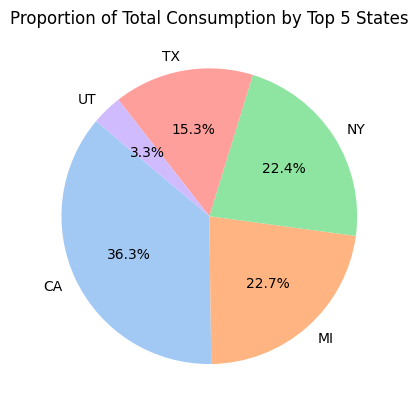

In [95]:
# 4. Pie chart for top 5 states by total consumption
top_5_states = df.groupby('state')['consumption'].sum().nlargest(5)
plt.pie(top_5_states, labels=top_5_states.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Total Consumption by Top 5 States')
plt.show()

## Bivariate Analysis

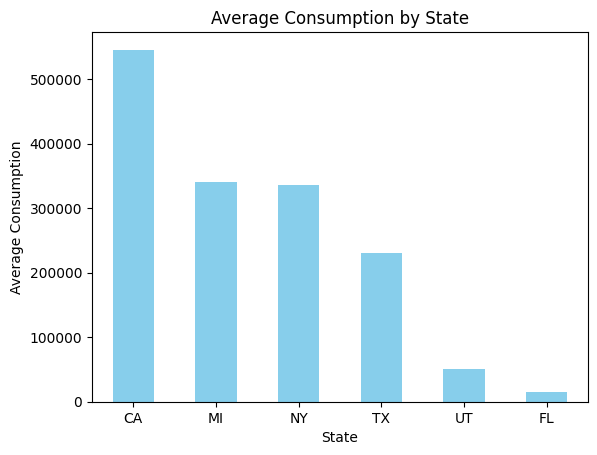

In [96]:
# 1. Bar chart for average consumption by state
avg_consumption_by_state = df.groupby('state')['consumption'].mean().sort_values(ascending=False)
avg_consumption_by_state.plot(kind='bar', color='skyblue')
plt.title('Average Consumption by State')
plt.xlabel('State')
plt.ylabel('Average Consumption')
plt.xticks(rotation=0)
plt.show()

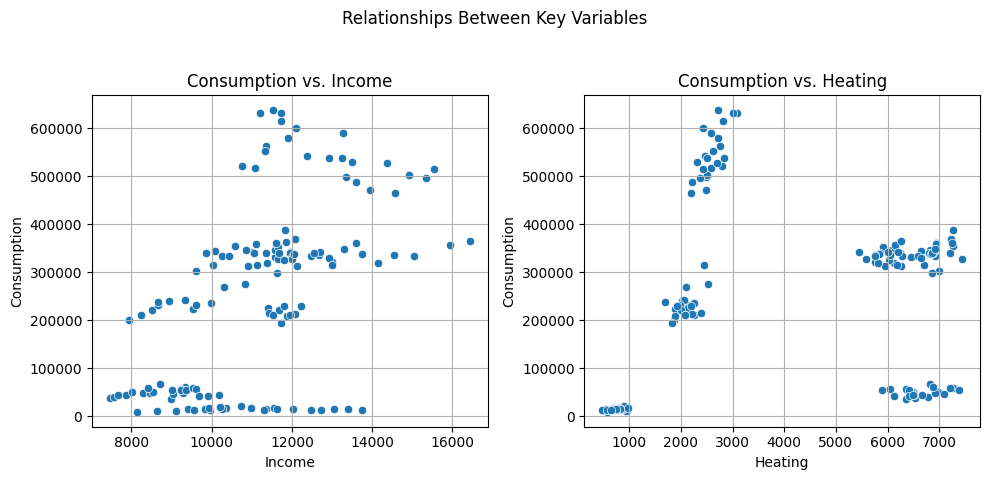

In [97]:
# 2. Consumption vs. Income & Consumption vs. Heating
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Relationships Between Key Variables', fontsize=12)
sns.scatterplot(x='income', y='consumption', data=df, ax=axes[0])
axes[0].set_title('Consumption vs. Income')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Consumption')
axes[0].grid(True)
sns.scatterplot(x='heating', y='consumption', data=df, ax=axes[1])
axes[1].set_title('Consumption vs. Heating')
axes[1].set_xlabel('Heating')
axes[1].set_ylabel('Consumption')
axes[1].grid(True)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

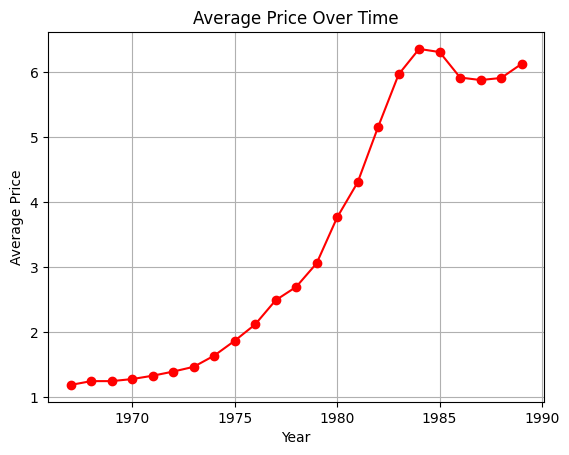

In [98]:
# 3. Average price over time
avg_price_by_year = df.groupby('year')['price'].mean()
avg_price_by_year.plot(kind='line', marker='o', color='red')
plt.title('Average Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

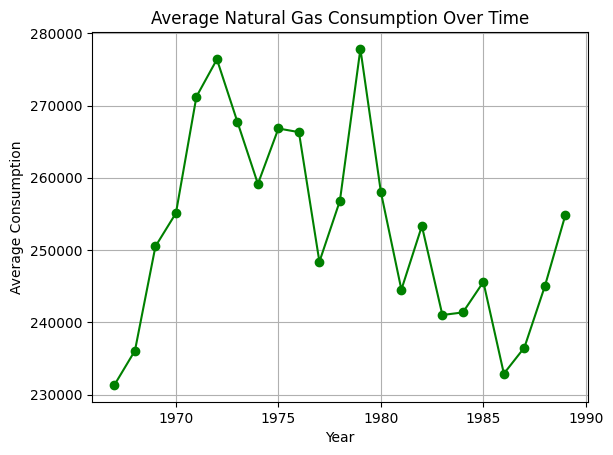

In [99]:
# 4. Line chart for average consumption over time
avg_consumption_by_year = df.groupby('year')['consumption'].mean()
avg_consumption_by_year.plot(kind='line', marker='o', color='green')
plt.title('Average Natural Gas Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Average Consumption')
plt.grid(True)
plt.show()

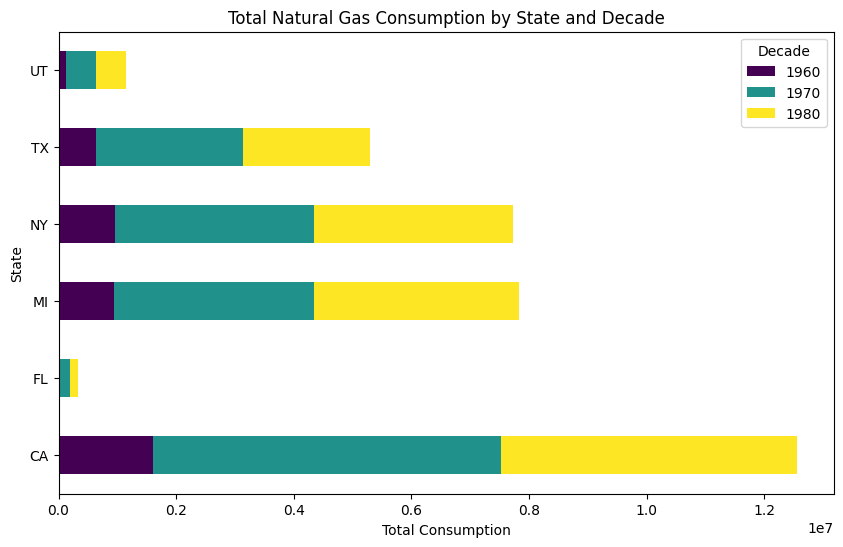

In [100]:
# 5. Horizontal stacked bar chart

# Create a 'decade' column for better visualization
df['decade'] = (df['year'] // 10) * 10

# Group by state and decade, and sum the consumption
consumption_by_decade = df.groupby(['state', 'decade'])['consumption'].sum().unstack()

# Create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
consumption_by_decade.plot(kind='barh', stacked=True, ax=ax, colormap='viridis')

# Set the title and labels
plt.title('Total Natural Gas Consumption by State and Decade')
plt.xlabel('Total Consumption')
plt.ylabel('State')
plt.legend(title='Decade')

plt.show()

## Multivariate Analysis

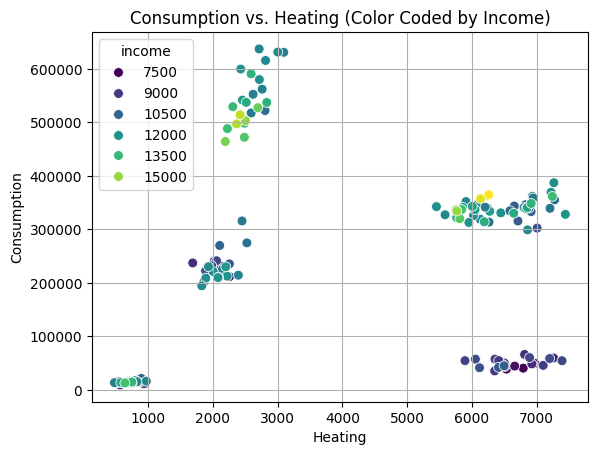

In [101]:
# 1. Consumption vs. Heating with Income
sns.scatterplot(x='heating', y='consumption', hue='income', data=df, palette='viridis', s=50)
plt.title('Consumption vs. Heating (Color Coded by Income)')
plt.xlabel('Heating')
plt.ylabel('Consumption')
plt.grid(True)
plt.show()

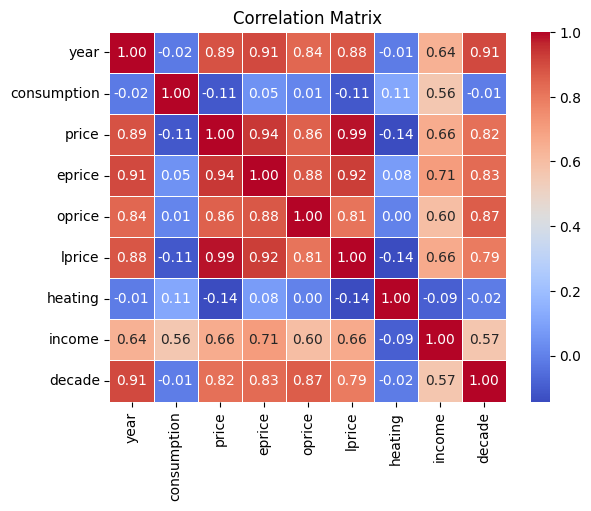

In [102]:
# 2. Heatmap: Correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

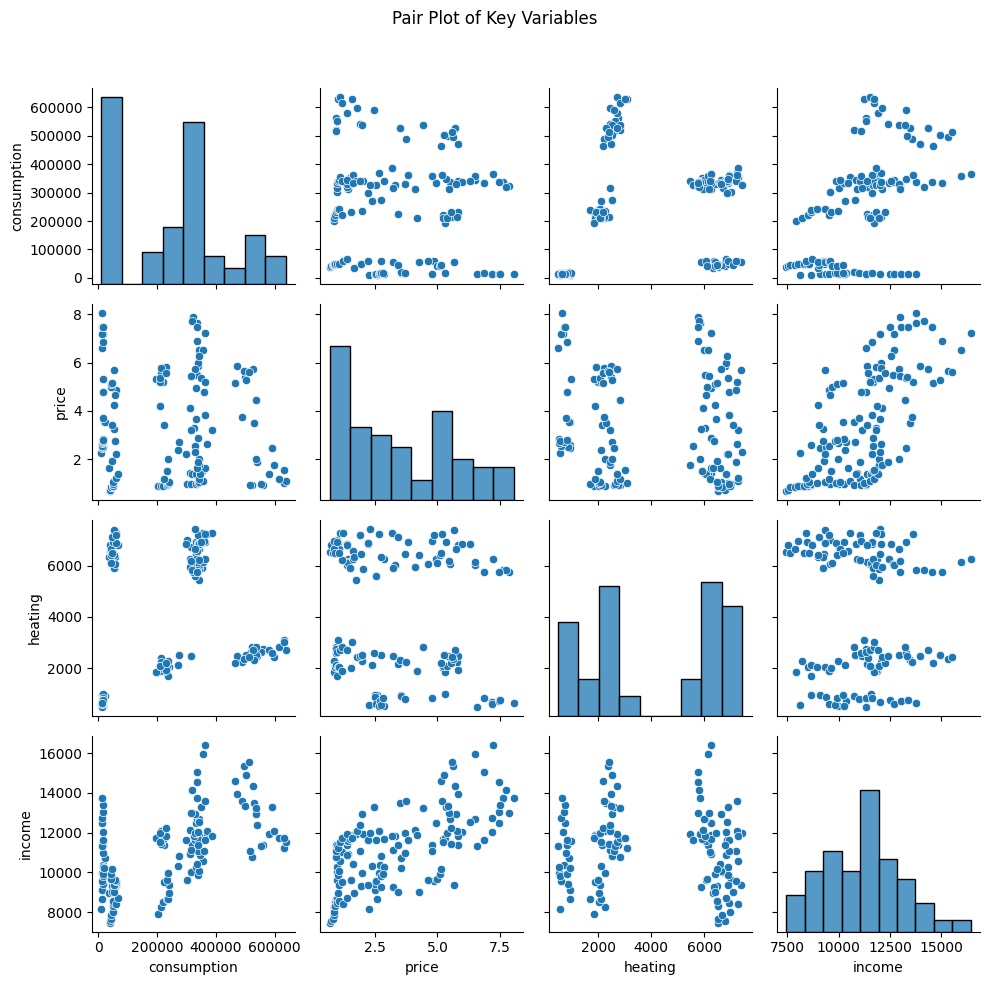

In [103]:
# 3. Multivariate Pair Plot
selected_cols = ['consumption', 'price', 'heating', 'income']
sns.pairplot(df[selected_cols])
plt.suptitle('Pair Plot of Key Variables')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()